In [52]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [50]:
values = np.zeros(20)
x1 = np.random.normal(loc=3, scale=1, size=(20,))
x2 = np.random.normal(loc=12, scale=1, size=(20,))
x3 = np.random.normal(loc=18, scale=1, size=(20,))

X = np.array([])
X = np.append(X,[x1, x2, x3])

print(X)

[ 1.78334935  4.26209614  1.69100997  4.02655399  3.55928708  2.97030429
  3.64257537  1.96520258  3.12282073  2.61925607  0.67810843  3.02962399
  2.84567411  2.30722441  0.53903083  1.94528323  3.93676792  2.31405934
  2.95266092  5.04439444 12.60190057 10.87999097 12.72256212 11.90902715
 10.77428479 13.15834496 12.26518427 10.5348409  12.36790163 13.13616856
 13.35310195 11.98390485 10.91400904 12.70697728 12.74320563 11.891102
 13.04392249 13.05318802 12.62599404 12.34462855 17.51836738 17.57829117
 18.54861543 17.69190482 17.45060172 17.47103265 17.72304403 16.23172968
 17.97868897 19.01916915 17.31276289 18.01012454 18.92927113 18.65440065
 17.37473686 18.15881289 19.11878704 18.00058273 19.11069692 19.43202144]


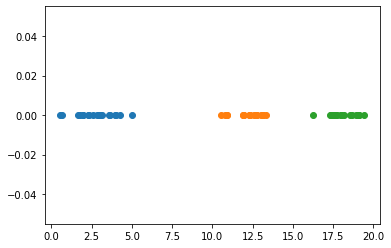

In [51]:
plt.plot(x1, values, 'o')
plt.plot(x2, values, 'o')
plt.plot(x3, values, 'o')
# values = np.zeros(60)
# plt.plot(X, values, 'o')

In [126]:
# Elbow method

def elbow_method(k, points):

    WCSS=0
    cluster_points = np.random.random_integers(math.floor(min(points)), math.ceil(max(points)), k)

    for point in points:
        for i in range(len(cluster_points)):
            if i == 0:  
                min_val = abs(point-cluster_points[i])

            else:
                temp = abs(point-cluster_points[i])
                if temp < min_val:
                    min_val = temp

        WCSS += min_val**2


    # print(cluster_points)
    # print(WCSS)

    return WCSS

4499.569698020919


/tmp/ipykernel_18806/107002287.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead
  cluster_points = np.random.random_integers(math.floor(min(points)), math.ceil(max(points)), k)


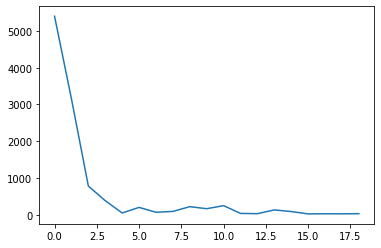

In [138]:
print(elbow_method(3, X))

k_values = [elbow_method(i, X) for i in range(1,20)]
plt.plot(k_values)

In [139]:
print(k_values)

[5400.632537401554, 3152.218679794171, 779.2238294083895, 380.85870000836314, 47.26507296886593, 199.56973969844648, 66.11894192789377, 90.31550947823301, 218.73065910814512, 163.97622535994927, 246.23277814121772, 34.994161088596314, 28.338569155382206, 130.83519533908463, 85.70642845737314, 21.766696622115383, 25.754538895543796, 24.49904241501222, 28.820628608599883]


In [152]:
def avg(cluster_points, clusters):
    for i in range(len(clusters)):
        cluster_points[i] = sum(clusters[i])/len(clusters[i])

    return cluster_points

In [172]:
k=3
cluster_points = np.random.random_integers(math.floor(min(X)), math.ceil(max(X)), k)
clusters = []

for i in range(3):
    clusters.append([])
N = 10
for j in range(N):
    for x in X:
        cluster_id=0
        for i in range(len(cluster_points)):
            if i == 0:  
                    min_val = abs(x-cluster_points[i])
                    cluster_id = i
            else:
                temp = abs(x-cluster_points[i])
                if temp < min_val:
                    min_val = temp
                    cluster_id = i

        clusters[cluster_id].append(x)

    cluster_points = avg(cluster_points, clusters)



# print(clusters)

/tmp/ipykernel_18806/3017929277.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead
  cluster_points = np.random.random_integers(math.floor(min(X)), math.ceil(max(X)), k)


200


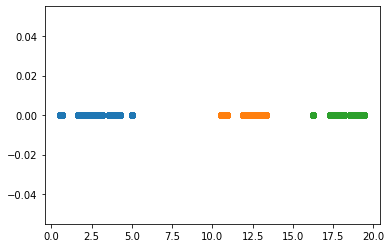

In [173]:
print(len(clusters[0]))
plt.plot(clusters[0], np.zeros(len(clusters[0])), 'o')
plt.plot(clusters[1], np.zeros(len(clusters[1])), 'o')
plt.plot(clusters[2], np.zeros(len(clusters[2])), 'o')